![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [347]:
import warnings
warnings.filterwarnings('ignore')

In [348]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [349]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [350]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [351]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [352]:
#Análisis variable season
season=bikes.groupby('season').total.mean()
print(season)
season.describe()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64


count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64

In [7]:
#Análisis variable season
hour=bikes.groupby('hour').total.mean()
print(hour)
hour.describe()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

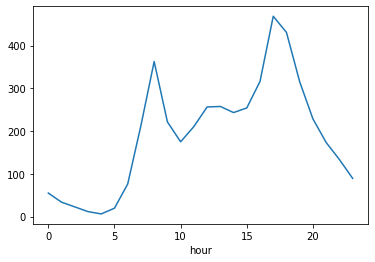

In [353]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

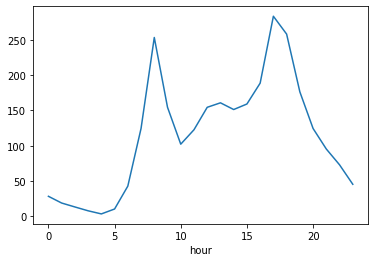

In [354]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.query('season == 1').groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

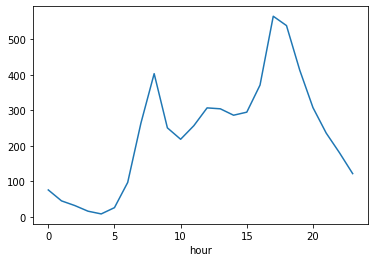

In [355]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.query('season == 3').groupby('hour').total.mean().plot()

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [356]:
# Celda 3
x=bikes[["season","hour"]]
y=bikes["total"]
lr=LinearRegression()
lr.fit(x,y)

print("Coeficientes:", lr.coef_)
print("Intercepto:", lr.intercept_)

Coeficientes: [26.95130851 10.52129824]
Intercepto: 2.5848513346807636


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [357]:
# Celda 4
max_depth = None
num_pct = 12
max_features = None
min_gain=0.001

In [358]:
j = 0

splits = np.percentile(x.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

k=3
filter_l = x.iloc[:, j] < splits[k]

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

def mse(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.mean((y - np.mean(y))**2)
    

In [359]:
def mse_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]       
    
    mse_y = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)
        
    mse_split = (len(y_l) * mse_l + len(y_r) * mse_r) / (len(y_l) + len(y_r))
    
    return mse_split

mse_impurity(x.iloc[:, j], y, splits[k])

32791.86322700233

In [360]:
def best_split(x, y, num_pct=12):
    
    features = range(x.shape[1])
        
    best_split = [0, 0, np.inf]      
   
    for j in features:
        
        splits = np.percentile(x.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
              
        for split in splits:            
            mse_new=  mse_impurity(x.iloc[:, j], y, split)                    
            
            if mse_new< best_split[2]:                
                best_split = [j, split, mse_new]
    return best_split

j, split, mse_new = best_split(x, y, 12)
j, split, mse_new



(1, 7.0, 22567.731076849614)

In [256]:
def tree_grow(x, y, level=0, max_depth=None, num_pct=12):
    
    if x.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, mse_new=mse_new)
        return tree
    
    j, split, mse_new = best_split(x, y, num_pct)
    
    y_pred = y.mean()
        
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=x.shape[0], mse_new=mse_new)
    if mse_new > np.inf:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    filter_l = x.iloc[:, j] < split
    X_l, y_l = x.loc[filter_l], y.loc[filter_l]
    X_r, y_r = x.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
   
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(x, y, level=0, max_depth=3, num_pct=12)
tree

{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [1, 7.0],
 'n_samples': 10886,
 'mse_new': 22567.731076849614,
 'sl': {'y_pred': 32.58203249442498,
  'level': 1,
  'split': [1, 6.0],
  'n_samples': 3139,
  'mse_new': 1242.1585299291157,
  'sl': {'y_pred': 25.177719821162444,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 2684,
   'mse_new': 754.3758482230128,
   'sl': {'y_pred': 44.51045104510451,
    'level': 3,
    'split': -1,
    'n_samples': 909,
    'mse_new': 1497.7069724159737},
   'sr': {'y_pred': 15.27718309859155,
    'level': 3,
    'split': -1,
    'n_samples': 1775,
    'mse_new': 279.4766705972457}},
  'sr': {'y_pred': 76.25934065934067,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 455,
   'mse_new': 2618.916814386772,
   'sl': {'y_pred': 42.72566371681416,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'mse_new': inf},
   'sr': {'y_pred': 87.3391812865497,
    'level': 3,
    'split': -1,
    'n_samples': 342,
    'mse_new': 3049.71761824

In [361]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred=tree_predict(X_test, tree)
y_pred

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:",mse)

MSE: 17861.439191945075


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [362]:
# Celda 5
max_depth = None
num_pct = 12
max_features = None
min_gain=0.001

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_depth_range = range(1, 21)
mse_scores = []

for depth in max_depth_range:    
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores.append((-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean())

print(sorted(zip(mse_scores, max_depth_range))[::-1][-1])



(12896.20444516455, 8)


Text(0, 0.5, 'MSE')

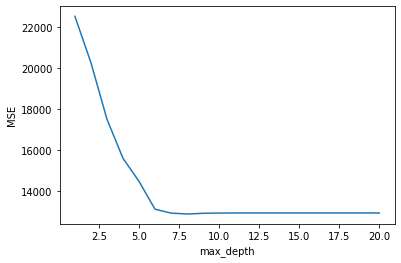

In [363]:
import matplotlib.pyplot as plt

plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [364]:
clf = DecisionTreeRegressor(max_depth=8, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:",mse)

MSE: 13464.749112666655


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [365]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [366]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [367]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [368]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier

max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:    
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred_DT = clf.predict(X_test)

accuracyDT=accuracy_score(y_true=y_test, y_pred=y_pred_DT)
print("Accuracy DT:",accuracyDT)

f1 = f1_score(y_test, y_pred_DT)
print("F1 DT:", f1)

from sklearn.linear_model import LogisticRegression

clfRegLog= LogisticRegression(solver='lbfgs',random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)
y_pred_RL=clfRegLog.predict(X_test)
       
accuracyRL=accuracy_score(y_true=y_test, y_pred=y_pred_RL)
print("Accuracy RL:",accuracyRL)
f1 = f1_score(y_test, y_pred_RL)
print("F1 RL:", f1)

Accuracy DT: 0.6453333333333333
F1 DT: 0.6448598130841121
Accuracy RL: 0.626
F1 RL: 0.6144329896907217


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [369]:
# Celda 7
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)
                       
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
pred=pd.DataFrame()
pred["Arbol_1"]=y_pred

accuracyA1=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Arbol_1:",accuracyA1)
f1_A1 = f1_score(y_test, y_pred)
print("F1 Arbol_1:", f1)

Accuracy Arbol_1: 0.6533333333333333
F1 Arbol_1: 0.6144329896907217


In [370]:
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=4, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)
                       
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
pred["Arbol_2"]=y_pred

accuracyA2=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Arbol_2:",accuracyA2)
f1_A2 = f1_score(y_test, y_pred)
print("F1 Arbol_2:", f1_A2)

Accuracy Arbol_2: 0.6546666666666666
F1 Arbol_2: 0.6564986737400531


In [371]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

clfRegLog = BaggingClassifier(base_estimator=LogisticRegression(solver='lbfgs',random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)

clfRegLog.fit(X_train,y_train)
y_pred=clfRegLog.predict(X_test)
pred["LR"]=y_pred

accuracyLR=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy LR:",accuracyLR)
f1_LR = f1_score(y_test, y_pred)
print("F1 LR:", f1_LR)

Accuracy LR: 0.624
F1 LR: 0.6121045392022008


Accuracy VM: 0.648
F1 LR: 0.648936170212766


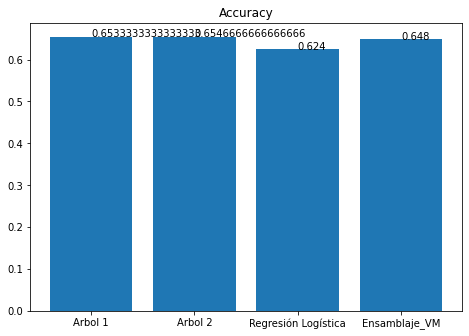

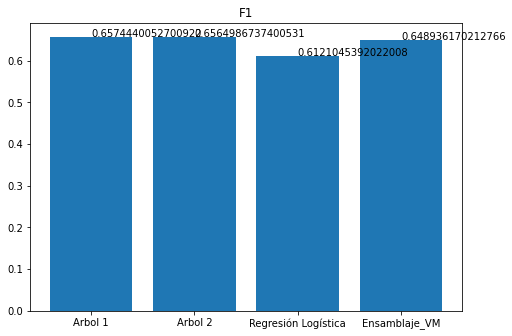

In [372]:
y_pred = (pred.sum(axis=1) >= (pred.shape[1] / 2)).astype(np.int)
y_pred

accuracyVM=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy VM:",accuracyVM)
f1_VM = f1_score(y_test, y_pred)
print("F1 LR:", f1_VM)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Arbol 1', 'Arbol 2','Regresión Logística', 'Ensamblaje_VM']
ejeY = [accuracyA1,accuracyA2,accuracyLR, accuracyVM]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)

fig = plt.figure()
ax2= fig.add_axes([0,0,1,1])
ax2.set_title("F1")
ejeX = ['Arbol 1', 'Arbol 2','Regresión Logística', 'Ensamblaje_VM']
ejeY = [f1_A1,f1_A2,f1_LR, f1_VM]
ax2.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)

plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [415]:
# Celda 8
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)

clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

errors = np.zeros(clf1.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf1.n_estimators))

for i in range(clf1.n_estimators):
    oob_sample = ~clf1.estimators_samples_[i]
    y_pred_ = clf1.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])    
    y_pred_all_[:, i] = clf1.estimators_[i].predict(X_test)
  
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

pred_VP=pd.DataFrame()
pred_VP["A1"]=y_pred
accuracyA1=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Arbol_1:",accuracyA1)
f1_A1 = f1_score(y_test, y_pred)
print("F1 Arbol_1:", f1_A1)

Accuracy Arbol_1: 0.654
F1 Arbol_1: 0.6560636182902585


In [416]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=4, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)
                       
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

errors = np.zeros(clf2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf2.n_estimators))

for i in range(clf2.n_estimators):
    oob_sample = ~clf2.estimators_samples_[i]
    y_pred_ = clf2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])    
    y_pred_all_[:, i] = clf2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

pred_VP["A2"]=y_pred
accuracyA2=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Arbol_2:",accuracyA2)
f1_A2 = f1_score(y_test, y_pred)
print("F1 Arbol_2:", f1_A2)

Accuracy Arbol_2: 0.6473333333333333
F1 Arbol_2: 0.634920634920635


In [417]:
clfRegLog = BaggingClassifier(base_estimator=LogisticRegression(solver='lbfgs',random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=1, oob_score=True)

clfRegLog.fit(X_train,y_train)
y_pred=clfRegLog.predict(X_test)
pred["LR"]=y_pred

errors = np.zeros(clfRegLog.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfRegLog.n_estimators))

for i in range(clfRegLog.n_estimators):
    oob_sample = ~clfRegLog.estimators_samples_[i]
    y_pred_ = clfRegLog.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])    
    y_pred_all_[:, i] = clfRegLog.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

pred_VP["LR"]=y_pred
accuracyLR=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy LR:",accuracyLR)
f1_LR = f1_score(y_test, y_pred)
print("F1 LR:", f1_LR)

Accuracy LR: 0.624
F1 LR: 0.6104972375690608


In [418]:
pred_VP

,A1,A2,LR
0,1,1,1
1,1,1,1
2,1,0,1
3,1,1,1
4,0,0,0
...,...,...,...
1495,0,0,0
1496,0,0,0
1497,1,1,1
1498,0,0,0


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Accuracy VP: 0.6506666666666666
F1 VP: 0.6473755047106325


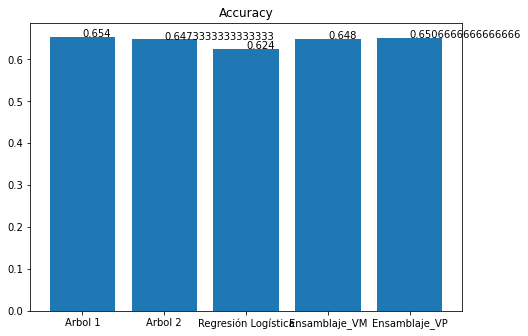

In [419]:
# Celda 9
y_pred = (pred_VP.sum(axis=1) >= (pred.shape[1] / 2)).astype(np.int)
y_pred

accuracyVP=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy VP:",accuracyVP)
f1_VP = f1_score(y_test, y_pred)
print("F1 VP:", f1_VP)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Arbol 1', 'Arbol 2','Regresión Logística', 'Ensamblaje_VM','Ensamblaje_VP']
ejeY = [accuracyA1,accuracyA2,accuracyLR, accuracyVM, accuracyVP]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)

plt.show()